In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

from scipy.stats import invwishart
from scipy.stats import beta
from scipy.stats import binom

# Assignement 1
Experiment with custom distributions  
Given 
* PDF $p(x)=x^2$
* CDF $F(a)=p(x<a)$
* domain $[-1,1]$  

Compute CDF and inverse for inverse sampling 

### 1.1 Solution

The CDF definition is :  

$$
\qquad F(a) = p(x < a) = \int_{lower}^{a}p(x)dx 
$$

Integral of $p(x)$  

$$
\qquad P(x) = \frac{1}{3}x^3 + c
$$

Compute integral over domain of $[-1,1]$  

$$
\qquad \left[ \frac{1}{3}x^3 \right]^{1}_{-1} = \frac{2}{3}
$$

So normalization constant for pdf $p(x)=x^2$ is $\frac{3}{2}$

$$
\qquad p(x) = \frac{3}{2}x^2
$$

Compute integral of normalized pdf

$$\begin{align}
    P(x) &=  \int_{-1}^{x} \frac{3}{2}x^2 dx \\\\
    &= \left[ \frac{1}{2}x^3 \right]^{x}_{-1} \\
    &= \frac{x^3 + 1}{2}
\end{align}$$

So final CDF of normalized pdf $p(x) = \frac{3}{2}x^2$ over the domain $[-1,1]$ is 
$$
P(x) = \frac{x^3 + 1}{2}
$$  

Invert the CDF  

$$
    x = \frac{(P^{-1}(x))^3 + 1}{2}\\
    \implies P^{-1}(x) = (2x - 1)^\frac{1}{3}
$$

In [37]:
def inverse_F(x):
    return np.cbrt(2*x - 1)

def p(x):
    return (3/2)*x**2

In [54]:
us = np.random.uniform(0, 1, size=10000)

In [55]:
samples = np.array([inverse_F(u) for u in us])
xs= np.linspace(-1,1,1000)
line = [p(x) for x in xs]

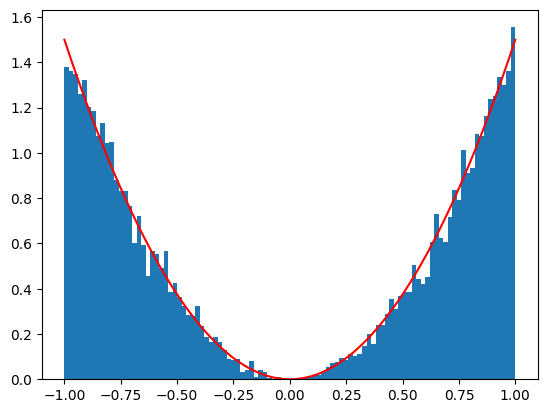

In [56]:
plt.hist(samples, bins=100, density=True)
plt.plot(xs, line, 'r-')
plt.show()

# Assignment 2 : Metropolis Sampling

Given
* PDF : $p(x) = x^2$
* Domain : $[0,1]$

To Do
1) Find Normalizing Constant 
2) Draw IID samples by inverse sampling. Find the PDF, then CDF, invert CDF, then draw samples using inverse function 
3) Use Rejection Sampling to sample from distribution. Use random draw of tuples; reject points above curve, retain ones under curve 
4) Implement two Metropolis Algorithm   
$\qquad$ (a) with Uniform distribution $[0,1]$ as proposal distribution  
$\qquad$ (b) with Gaussian distribution as proposal distribution

### 2.1 Find Normalizing Constant

1) Integral of $p(x)$

$$
\qquad P(x) = \frac{1}{3}x^3 + c
$$

2) Compute integral over domain of $[0,1]$  

$$
\qquad \left[ \frac{1}{3}x^3 \right]^{1}_{0} = \frac{1}{3}
$$

So normalization constant for pdf $p(x)$ is $3$

$$
\qquad p(x) = 3x^2
$$

### 2.2 Draw IID Samples by Inverse Sampling 
1) Compute CDF 
$$\begin{align}
    P(x) &= \int_0^x 3x^2 dx\\
         &= \left[ x^3 \right]_{0}^{x}\\
         &= x^3
\end{align}$$

2) Invert CDF 
$$\begin{align}
    x &= (P^{-1}(x))^3\\
    \implies& P^{-1}(x) = (x)^\frac{1}{3}
\end{align}$$

In [5]:
def inverse_F(x):
    return np.cbrt(x)

def p(x):
    return 3*x**2

In [136]:
us = np.random.uniform(0, 1, size=10000)

In [137]:
samples = np.array([inverse_F(u) for u in us])

In [9]:
line_xs = np.linspace(0,1,10000)
line = [p(x) for x in line_xs]

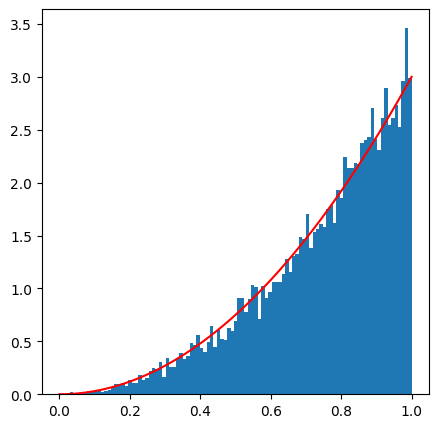

In [141]:
plt.figure(figsize=(5,5))
plt.hist(samples, bins=100, density=True)
plt.plot(line_xs,line,'r-')
plt.show()

### 2.3 Rejection Sampling
Use random draw of tuples; reject points above curve, retain ones under curve 

##### Proposal Function :

Constraint:

$$\begin{align}
Mq(x) &>= p(x)\\
\implies Mq(x) &>= 3x^2
\end{align}$$

Let 
$$
    Mq(x) = 3 * U(0,1)
$$
because uniform is easy to sample from, despite large number of wasted samples

In [116]:
xs = np.random.uniform(0, 1, size=5000)
ys = np.random.uniform(0, 3, size=5000)

In [117]:
keep = []
reject = []
for i in range(0, len(xs)):
    if ys[i] <= p(xs[i]):
        keep.append([xs[i],ys[i]])
    else:
        reject.append([xs[i],ys[i]])

keep = np.array(keep)
reject = np.array(reject)

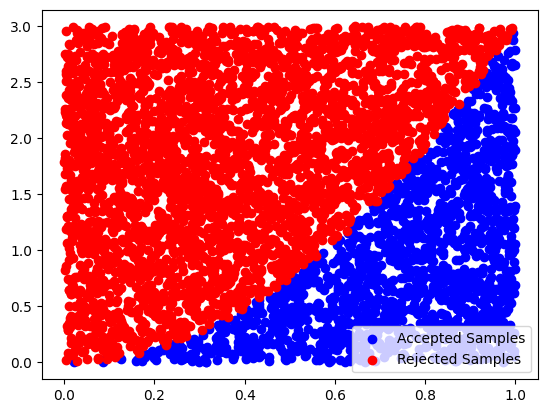

In [118]:
plt.scatter(keep[:,0],keep[:,1], c='blue', label="Accepted Samples")
plt.scatter(reject[:,0],reject[:,1], c='red', label="Rejected Samples")
plt.legend()
plt.show()

In [343]:
# Acceptance Ratio
len(keep)/(len(reject) + len(keep))

0.3292

### 2.4 Metropolis Sampling with Uniform Proposal Distribution Between $[0,1]$

In [286]:
def metropolis_uniform(num_steps, num_burn):
    accepted=0
    xs = []

    # Initialize x_0
    x = np.random.uniform(0,1)

    for t in range(0, num_steps + num_burn):
        # Sample from proposal distribution
        x_star = np.random.uniform(0,1)

        # Compute acceptance probability
        α = min(1,p(x_star)/p(x))

        # Determine x^(t)
        u = np.random.uniform(0,1)
        if α > u:
            x = x_star

            accepted += 1

        if t >= num_burn:
            xs.append(x)
    
    print("Acceptance Ratio:", accepted/(num_steps+num_burn))
    return xs


In [324]:
metro_samples = metropolis_uniform(100000, 25000)

Acceptance Ratio: 0.502456


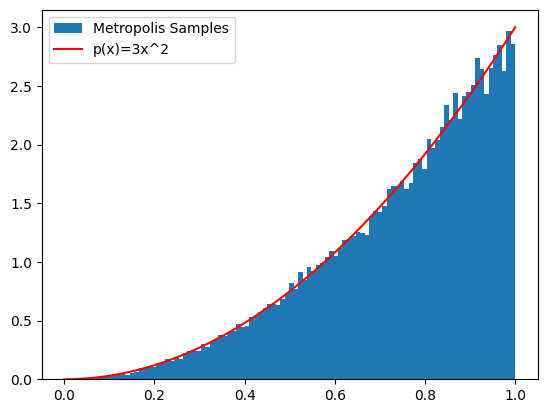

In [288]:
plt.hist(metro_samples, bins=100, density=True, label="Metropolis Samples")
plt.plot(line_xs,line,'r-', label="p(x)=3x^2")
plt.legend()
plt.show()

### 2.5 Metropolis Sampling with Gaussian Proposal Distribution

Conditioning:

$$
    x^{\gamma} = x^{(t-1)} + \epsilon, \qquad \epsilon \sim \mathcal{N}(0, \sigma^2)
$$

In [46]:
def pp(x):
    return (np.abs(x) < 1) * (x**2)

In [47]:
def log_p(x):
    return np.log(pp(x))

In [53]:
def metropolis_gaussian(num_steps, num_burn, std=0.01):
    xs = []

    accepted=0

    # Initialize x_0
    x = np.random.uniform(0,1)

    for t in range(0, num_steps + num_burn):
        # Sample from proposal distribution
        x_star = np.random.normal(x,std)

        # reject samples not in target distirbution's domain
        # if (x_star > 1 or x_star < 0) : 
        #     α = 0
        # else:
        #     # Compute acceptance probability
            # α = min(1,x_star**2/x**2)

        α = log_p(x_star) - log_p(x)

        # Determine x^(t)
        u = np.random.uniform(0,1)
        if np.exp(α) > u:
            x = x_star
            accepted += 1

        if t >= num_burn:
            xs.append(x)

    acceptance_ratio = accepted/(num_steps+num_burn)

    return xs,acceptance_ratio


In [57]:
metro_samples,acceptance_ratio = metropolis_gaussian(10000, 2500, 0.8)
print("Acceptance Ratio:", acceptance_ratio)

Acceptance Ratio: 0.30184


/tmp/ipykernel_549062/1072887380.py:2: RuntimeWarning: divide by zero encountered in log
  return np.log(pp(x))


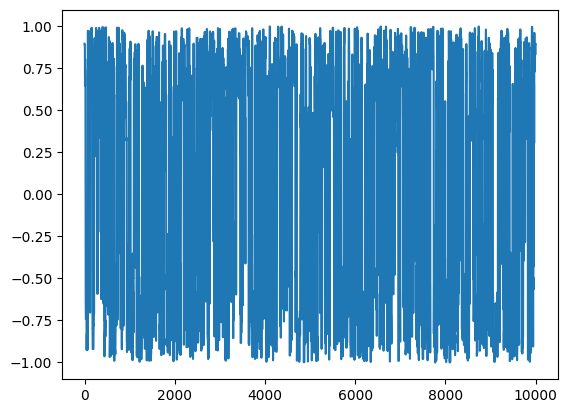

In [58]:
plt.plot(metro_samples)
plt.show()

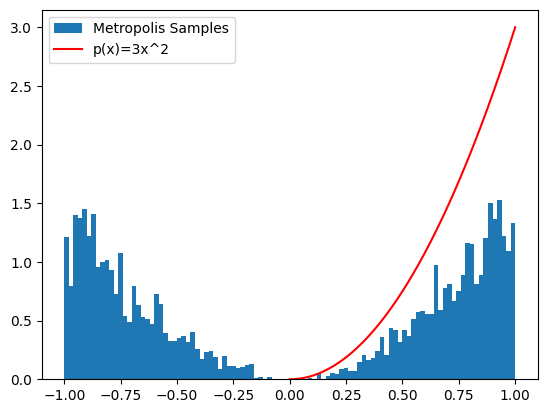

In [59]:
plt.hist(metro_samples, bins=100, density=True, label="Metropolis Samples")
plt.plot(line_xs,line,'r-', label="p(x)=3x^2")
plt.legend()
plt.show()

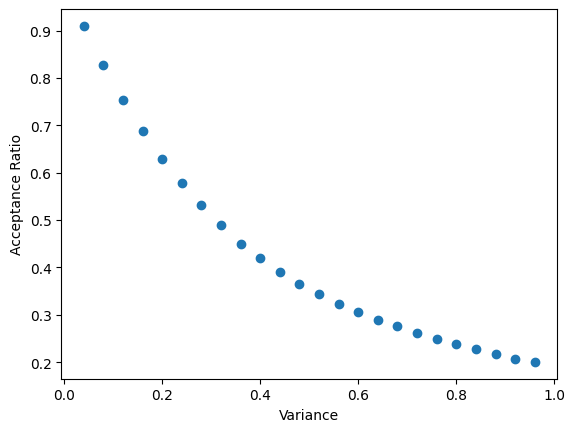

In [448]:
stds = [i/25 for i in range(1, 25)]
ratios=[]
for std in stds:
    _, ratio = metropolis_gaussian(100000,25000,std)
    ratios.append(ratio)
plt.scatter(stds,ratios)
plt.xlabel("Variance")
plt.ylabel("Acceptance Ratio")
plt.show()

higher variance leads to higher rejection rate. 

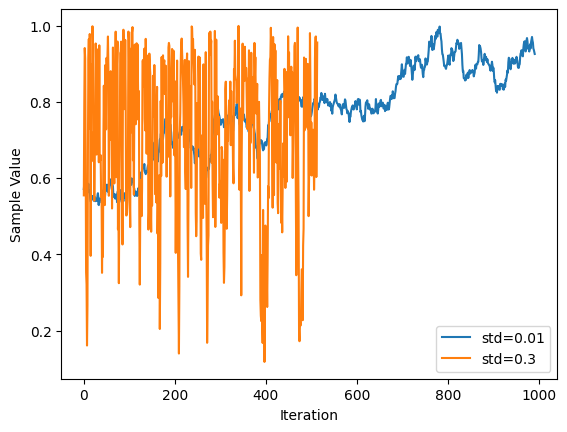

In [462]:
for std in [0.01, 0.3]:
    samples, _ = metropolis_gaussian(1000, 250, std)
    plt.plot(samples, label=f'std={std}')
plt.xlabel('Iteration')
plt.ylabel('Sample Value')
plt.legend()
plt.show()

Can see that higher variance leads to larger and more erratic exploration of target domain space. There are much fewer samples for larger variance, showing the higher rejection rate.

### Summary Notes
Inverse sampling is inherently 100% acceptance, but requires analytical solution to compute integral of pdf. Infeasible for highly complex, intractible non-standard distributions.

Rejection sampling avoids analytical solution but can have very bad acceptance ratio depending on proposal (envelope) distribution. Finding a good proposal distribution can be difficult, especially in high dimensional data.

Metropolis relaxes requirements for proposal distribution. 
* It has better acceptance than rejection sampling for uniform proposal distribution due to markov chaining from acceptance criteria (local likelihood)
* Metropolis using random-walk with Gaussian proposal distribution has even better acceptance rate since the candidate samples in each step are more likely - proposals stay in regions of higher probability. 
* Uniform proposal distribution over $[0,1]$ more likely to explore/propose values that are very low probability, leading to more rejections, but potentially wider exploration of target distribution state space. 
* The higher the dimension the data is, the less feasible global proposal distributions are since the domain space is much larger.
* Configuration of Gaussian proposal distribution has large effect on acceptance rate. Larger variance means "walk" through domain space is faster but has higher rejection rate. 

# Assignment 3 : Infer Parameters of Bernoulli Distribution  

Given
* 10 Coin Flips  
* 8 Are heads 
* Assume Beta prior distribution  

Do  
* Workout formula of posterior distribution
* Describe what the hyper parameters of Beta represent

Posterior:

$$\begin{align}
    p(\theta|D) &= p(D|\theta)p(\theta)\\\\
                &= \mathcal{Bin}(k|n,\theta)\mathcal{Beta}(\theta|a,b)\\\\
                &= {n\choose k}\theta^{(k)}(1-\theta)^{(n-k)}\left(\frac{1}{B(a,b)}\right)\theta^{(a-1)}(1-\theta)^{(b-1)}\\\\
                &\propto \theta^{(k)}(1-\theta)^{(n-k)}\theta^{(a-1)}(1-\theta)^{(b-1)}\\\\
                &= \theta^{(a + k - 1)}(1-\theta)^{(b + n - k - 1)}\\
\end{align}$$

Hence 
$$\begin{align}
    &p(\theta|D) = \mathcal{Beta}(\theta|a+k,b+n-k) = \frac{1}{B(a+k,b+n-k)}\theta^{(a + k - 1)}(1-\theta)^{(b + n - k - 1)}\\
    \implies &p(\theta|{k=8,n=10}) = \mathcal{Beta}(\theta|a+8,b+2) = \frac{1}{B(a+8,b+2)}\theta^{(a + 7)}(1-\theta)^{(b + 1)}
\end{align}$$

with enough data converges to a gaussian. mean of gaussian will be the true parameter. variance will be proportional to information matrix. Bayesian converges to give same result as frequentist but with different interpretation.


So Beta distribution is a conjugate prior to Binomial likelihood, hence the posterior is also Beta.

Can see how with enough data, the data overwhelms the prior, and MAP converges with MLE 

Since $\lim_{n\to\infty}$,
* $a + k \approx k$  
* $b + n - k \approx n - k$ 

$$\begin{align}
    \lim_{n\to\infty} \theta_{MAP} &= \lim_{n\to\infty} \argmax_{\theta} p(\theta|D)\\
                                   &= \lim_{n\to\infty} \argmax_{\theta} \mathcal{Beta}(\theta|a+k,b+n-k) \\
                                   &= \lim_{n\to\infty} \argmax_{\theta} \left[ \theta^{(a + k - 1)}(1-\theta)^{(b+n-k - 1)} \right], \quad \text{normalization constant does not affect argmax}\\
                                   &\approx  \argmax_{\theta} \left[ \theta^{(k)}(1-\theta)^{(n-k)} \right], \quad \text{as } n \to \infty\\
                                   &= \argmax_{\theta} \mathcal{Bin}(k|n,\theta), \quad \text{normalization constant does not affect argmax}\\
                                   &= \argmax_{\theta} p(D|\theta)\\
                                   &= \theta_{MLE}
\end{align}$$


The parameters of the Beta distribution $a$ and $b$ represent a notion of previous successes and failures (prior beliefs) repsectively before the current newly observed data. They shape the prior distibution density over where you believe $\theta$ to be

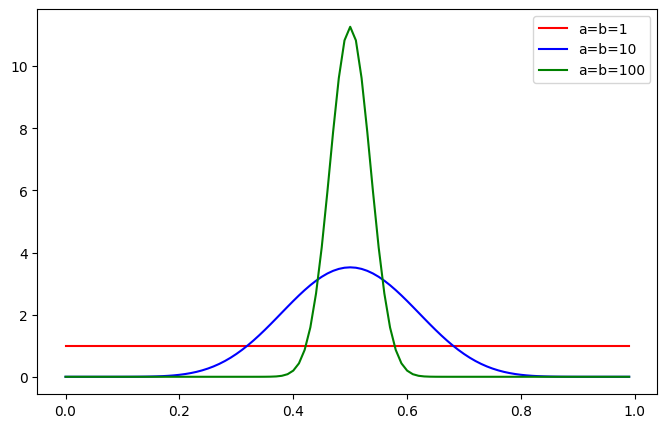

In [78]:
thetas = [x/100 for x in range(0,100)]
vals1 = [beta.pdf(x,1,1) for x in thetas]
vals2 = [beta.pdf(x,10,10) for x in thetas]
vals3 = [beta.pdf(x,100,100) for x in thetas]


plt.figure(figsize=(8, 5))
plt.plot(thetas, vals1, c='red', label='a=b=1')
plt.plot(thetas, vals2, c='blue', label='a=b=10')
plt.plot(thetas, vals3, c='green', label='a=b=100')
plt.legend()
plt.show()

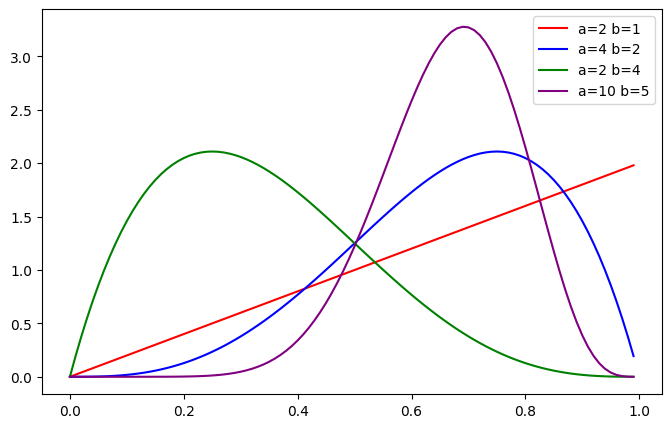

In [64]:
thetas = [x/100 for x in range(0,100)]
vals1 = [beta.pdf(x,2,1) for x in thetas]
vals2 = [beta.pdf(x,4,2) for x in thetas]
vals3 = [beta.pdf(x,2,4) for x in thetas]
vals4 = [beta.pdf(x,10,5) for x in thetas]

plt.figure(figsize=(8, 5))
plt.plot(thetas, vals1, c='red', label='a=2 b=1')
plt.plot(thetas, vals2, c='blue', label='a=4 b=2')
plt.plot(thetas, vals3, c='green', label='a=2 b=4')
plt.plot(thetas, vals4, c='purple', label='a=10 b=5')
plt.legend()
plt.show()